<img src="https:////scontent.fhan9-1.fna.fbcdn.net/v/t39.30808-6/339122927_1347965006053141_1323654940389313527_n.jpg?_nc_cat=1&ccb=1-7&_nc_sid=5f2048&_nc_ohc=RxgK2wQBdfIAX9RQ12B&_nc_ht=scontent.fhan9-1.fna&oh=00_AfBOx5rlfgrGYgo-aGWT946hcP3U0n2WBaCcYTFM6OyZww&oe=65506ED3"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>

##  PHÂN TÍCH DỮ LIỆU PAGE [đài phát thanh](https://www.facebook.com/daiphatthanh.sound)
## Bài phân viết phân tích page được viết trong [NOTION](https://www.notion.so/Data-Analyze-Page-Facebook-6ba0209824a04832b291f084f583f6b9).

Phân tích dữ liệu: Một số câu hỏi tiềm năng để phân tích như: Đâu là bài viết
có lượt tương tác lớn nhất trong bộ dữ liệu?; Các mốc thời gian trong ngày mà
Fanpage thường xuyên đăng bài viết?; Số lượt tương tác trong các bài đăng thay
đổi như thế nào?; Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được
thu thập?; Sự tương quan giữa số lượng reactions với các trường khác như số lượng
bình luận, độ dài bài viết?; v.v. Ngoài ra, nếu có dữ liệu từ hai trang Fanpage mà
giả sử là hai trang tin tức, sự tương quan giữa nội dung của hai trang Fanpage như
thế nào?; v.v.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'Data\Data_dpt.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   post_id             174 non-null    int64  
 1   post_text           174 non-null    object 
 2   time                174 non-null    object 
 3   timestamp           174 non-null    float64
 4   images_description  174 non-null    object 
 5   comments            174 non-null    int64  
 6   shares              174 non-null    int64  
 7   comments_full       174 non-null    object 
 8   reactors            174 non-null    object 
 9   reactions           174 non-null    object 
 10  reaction_count      174 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 15.1+ KB


In [4]:
df.head(3)

,post_id,post_text,time,timestamp,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,912937063532016,KHOẢNH KHẮC SƠN TÙNG M-TP MỪNG SINH NHẬT LẦN T...,2023-11-25 23:22:01,1.700929e+09,[],207,270,"[{'comment_id': '1885342205246846', 'comment_u...",[],"{'like': 2853, 'love': 2725, 'haha': 8, 'wow':...",5670
1,912919293533793,SƠN TÙNG M-TP MƯỢN SÂN KHẤU HÔM NAY ĐỂ CHÚC MỪ...,2023-11-25 22:52:46,1.700928e+09,"['Có thể là hình ảnh về 1 người và tóc mái', '...",176,66,"[{'comment_id': '760356642597061', 'comment_ur...","[{'name': 'Minh Phương', 'link': 'https://face...","{'like': 4183, 'love': 1963, 'haha': 11, 'wow'...",6217
2,912916456867410,"Mời các bạn ăn cơm tró lúc 11h đêm với ""Hà Nội...",2023-11-25 22:47:32,1.700927e+09,[],182,339,"[{'comment_id': '1511927352939405', 'comment_u...","[{'name': 'An Ann', 'link': 'https://facebook....","{'like': 3581, 'love': 2805, 'haha': 23, 'wow'...",6485


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Phân tích lượt react theo từng ngày.

In [5]:
post_df_full1 = df
post_df_full1[['post_id','reactions']]

,post_id,reactions
0,912937063532016,"{'like': 2853, 'love': 2725, 'haha': 8, 'wow':..."
1,912919293533793,"{'like': 4183, 'love': 1963, 'haha': 11, 'wow'..."
2,912916456867410,"{'like': 3581, 'love': 2805, 'haha': 23, 'wow'..."
3,912832070209182,"{'like': 2123, 'love': 601, 'haha': 20, 'wow':..."
4,912905323535190,"{'like': 3892, 'love': 2799, 'haha': 23, 'wow'..."
...,...,...
169,906122894213433,"{'like': 6042, 'love': 2339, 'haha': 10, 'wow'..."
170,906132410879148,"{'like': 1722, 'love': 714, 'haha': 1, 'care':..."
171,906147284210994,"{'like': 1704, 'love': 322, 'haha': 4, 'care':..."
172,906040377555018,"{'like': 4299, 'love': 1770, 'haha': 14, 'wow'..."


In [6]:
post_df_full2=post_df_full1[['time','timestamp' ,'reaction_count']]
post_df_full2

,time,timestamp,reaction_count
0,2023-11-25 23:22:01,1.700929e+09,5670
1,2023-11-25 22:52:46,1.700928e+09,6217
2,2023-11-25 22:47:32,1.700927e+09,6485
3,2023-11-25 22:30:20,1.700926e+09,2769
4,2023-11-25 22:22:34,1.700926e+09,6823
...,...,...,...
169,2023-11-12 20:00:49,1.699794e+09,8492
170,2023-11-12 19:30:33,1.699792e+09,2450
171,2023-11-12 19:02:54,1.699791e+09,2038
172,2023-11-12 13:43:43,1.699771e+09,6128


In [7]:
dates=post_df_full2['timestamp'].to_list()
y=post_df_full2['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)


174 174
[1699767982.0, 1699771423.0, 1699790574.0, 1699792233.0, 1699794049.0, 1699795803.0, 1699797184.0, 1699801786.0, 1699805943.0, 1699844801.0, 1699849537.0, 1699852252.0, 1699853846.0, 1699867201.0, 1699875818.0, 1699879527.0, 1699880454.0, 1699887214.0, 1699925367.0, 1699933323.0, 1699940194.0, 1699945750.0, 1699952018.0, 1699963958.0, 1699970422.0, 1699971764.0, 1699973351.0, 1699974743.0, 1700015427.0, 1700022697.0, 1700025357.0, 1700037568.0, 1700038447.0, 1700042585.0, 1700047495.0, 1700049611.0, 1700051931.0, 1700053612.0, 1700055176.0, 1700058656.0, 1700060533.0, 1700061491.0, 1700063049.0, 1700064900.0, 1700065361.0, 1700101005.0, 1700102707.0, 1700116290.0, 1700126583.0, 1700130926.0, 1700133158.0, 1700134214.0, 1700135361.0, 1700137921.0, 1700140560.0, 1700144508.0, 1700152839.0, 1700153880.0, 1700194929.0, 1700197130.0, 1700204873.0, 1700218793.0, 1700223594.0, 1700229809.0, 1700231869.0, 1700234916.0, 1700279530.0, 1700281770.0, 1700286760.0, 1700299601.0, 1700301620.

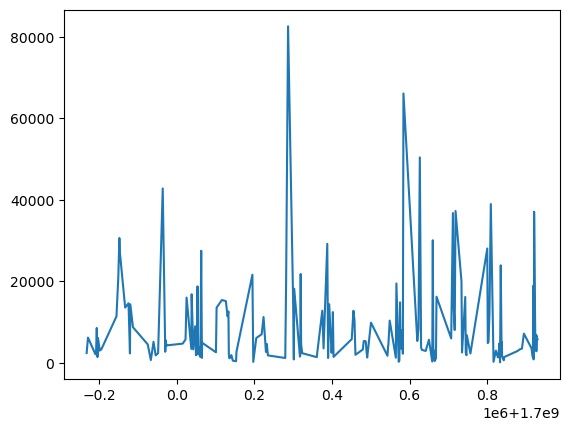

In [8]:
plt.plot(dates,y)
plt.show()


In [9]:


post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)))
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )

In [11]:

# gộp các cột lại vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]
#'like': 2853, 'love': 2725, 'haha': 8, 'wow': 1, 'care': 79, 'sad': 4

,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,KHOẢNH KHẮC SƠN TÙNG M-TP MỪNG SINH NHẬT LẦN T...,2853.0,2725.0,8.0,1.0,4.0,NaN,79.0,270,207,5670
1,SƠN TÙNG M-TP MƯỢN SÂN KHẤU HÔM NAY ĐỂ CHÚC MỪ...,4183.0,1963.0,11.0,3.0,1.0,NaN,56.0,66,176,6217
2,"Mời các bạn ăn cơm tró lúc 11h đêm với ""Hà Nội...",3581.0,2805.0,23.0,3.0,2.0,NaN,71.0,339,182,6485
3,Nếu như em gặp anh\nLúc hai ta đã trưởng thành...,2123.0,601.0,20.0,5.0,9.0,NaN,11.0,62,137,2769
4,Khoảnh khắc Tez gửi lời tri ân đến Pháo ngay t...,3892.0,2799.0,23.0,2.0,47.0,NaN,60.0,176,179,6823
...,...,...,...,...,...,...,...,...,...,...,...
169,Mùa 1 The Masked Singer có ‘Anh Thương Em Đến ...,6042.0,2339.0,10.0,2.0,51.0,NaN,48.0,730,283,8492
170,"Có một Việt Nam cổ kính, hoài niệm cùng chuyện...",1722.0,714.0,1.0,NaN,3.0,NaN,10.0,90,33,2450
171,"Nguyên Hà trở lại với sản phẩm mới mang tên ""N...",1704.0,322.0,4.0,NaN,2.0,NaN,6.0,23,7,2038
172,"Chị đẹp HyunA “xả ảnh”, khoe những món quà đán...",4299.0,1770.0,14.0,3.0,1.0,NaN,41.0,11,14,6128


In [12]:
for i in range(0, len(post_df_full_with_reactions['like'].values), 1):
    if pd.isna(post_df_full_with_reactions['like'].values[i]):
        post_df_full_with_reactions['like'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['love'].values[i]):
        post_df_full_with_reactions['love'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['sad'].values[i]):
        post_df_full_with_reactions['sad'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['angry'].values[i]):
        post_df_full_with_reactions['angry'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['care'].values[i]):
        post_df_full_with_reactions['care'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]

,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,KHOẢNH KHẮC SƠN TÙNG M-TP MỪNG SINH NHẬT LẦN T...,2853.0,2725.0,8.0,1.0,4.0,0.0,79.0,270,207,5670
1,SƠN TÙNG M-TP MƯỢN SÂN KHẤU HÔM NAY ĐỂ CHÚC MỪ...,4183.0,1963.0,11.0,3.0,1.0,0.0,56.0,66,176,6217
2,"Mời các bạn ăn cơm tró lúc 11h đêm với ""Hà Nội...",3581.0,2805.0,23.0,3.0,2.0,0.0,71.0,339,182,6485
3,Nếu như em gặp anh\nLúc hai ta đã trưởng thành...,2123.0,601.0,20.0,5.0,9.0,0.0,11.0,62,137,2769
4,Khoảnh khắc Tez gửi lời tri ân đến Pháo ngay t...,3892.0,2799.0,23.0,2.0,47.0,0.0,60.0,176,179,6823
...,...,...,...,...,...,...,...,...,...,...,...
169,Mùa 1 The Masked Singer có ‘Anh Thương Em Đến ...,6042.0,2339.0,10.0,2.0,51.0,0.0,48.0,730,283,8492
170,"Có một Việt Nam cổ kính, hoài niệm cùng chuyện...",1722.0,714.0,1.0,0.0,3.0,0.0,10.0,90,33,2450
171,"Nguyên Hà trở lại với sản phẩm mới mang tên ""N...",1704.0,322.0,4.0,0.0,2.0,0.0,6.0,23,7,2038
172,"Chị đẹp HyunA “xả ảnh”, khoe những món quà đán...",4299.0,1770.0,14.0,3.0,1.0,0.0,41.0,11,14,6128


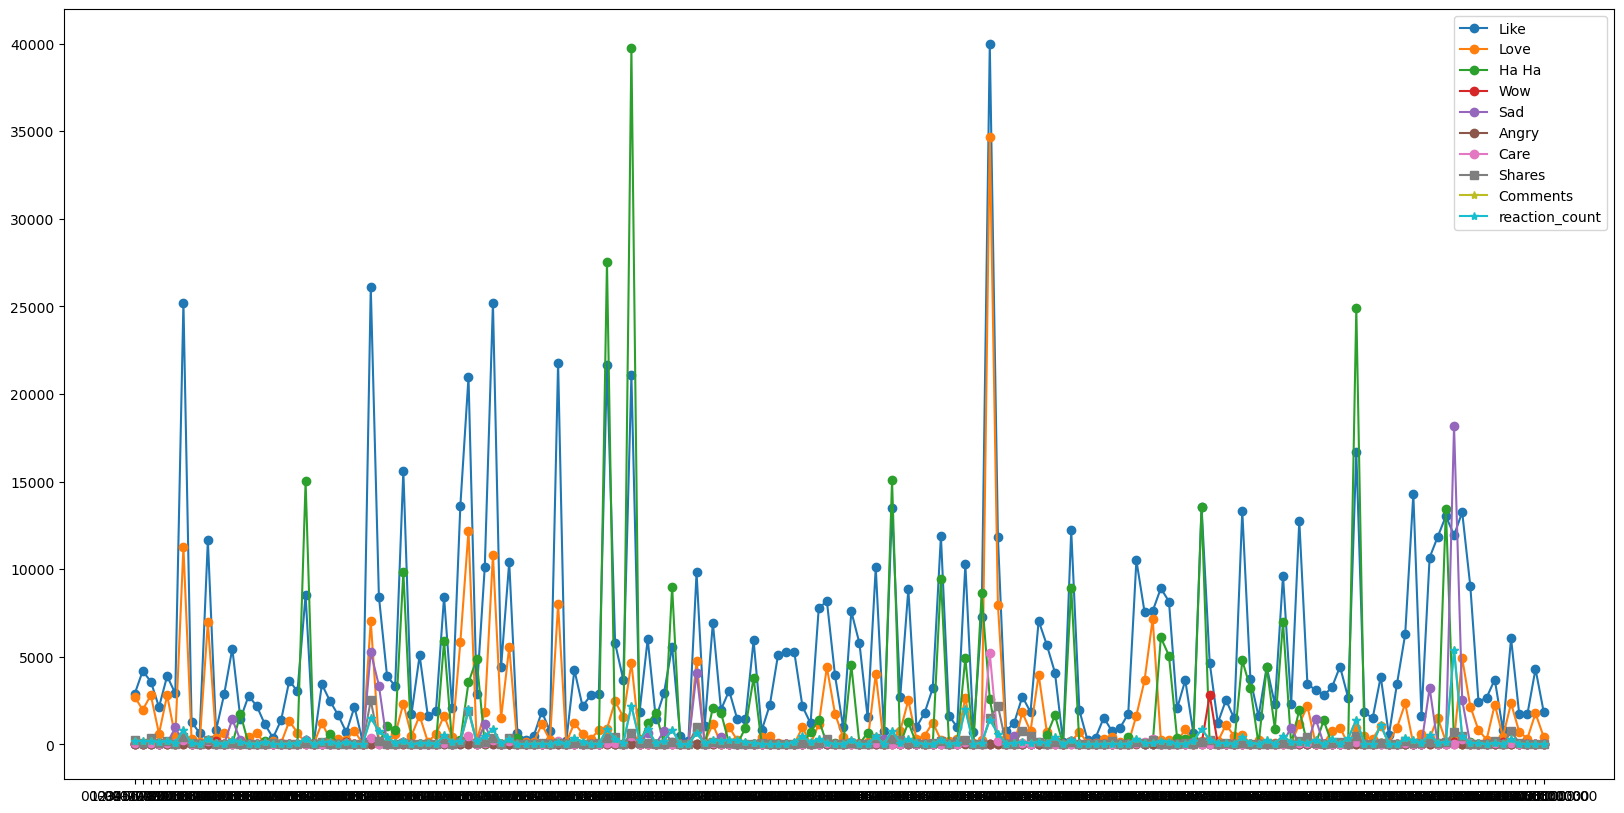

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['like'], label = "Like", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['love'], label = "Love", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['sad'], label = "Sad", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['angry'], label = "Angry", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['care'], label = "Care", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
     

In [15]:
# hiểm thị mối quan hệ Like, Love, Ha Ha, Wow, Sad, Angry, Care với cột Share
print(post_df_full_with_reactions[['like','love','haha','wow','sad','angry','care']].corrwith(post_df_full_with_reactions['shares']))
     

like     0.598739
love     0.618219
haha     0.134977
wow      0.041870
sad      0.297689
angry    0.094463
care     0.443262
dtype: float64


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

 Đâu là bài viết
có lượt tương tác lớn nhất trong bộ dữ liệu?

In [16]:
df.nlargest(1,'reaction_count')

,post_id,post_text,time,timestamp,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
105,909089207250135,THẦY GIÁO NHẬT “NGẠI NGÙNG” KHI LẦN ĐẦU ĐƯỢC T...,2023-11-18 12:52:40,1.700287e+09,[],1400,1500,"[{'comment_id': '1460715988059959', 'comment_u...","[{'name': 'Minh Hằng', 'link': 'https://facebo...","{'like': 39963, 'love': 34694, 'haha': 2593, '...",82515


- ngày 11-11 có nhiều tương tác.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài viết?

Text(0.5, 1.0, 'Posting frequency by hour')

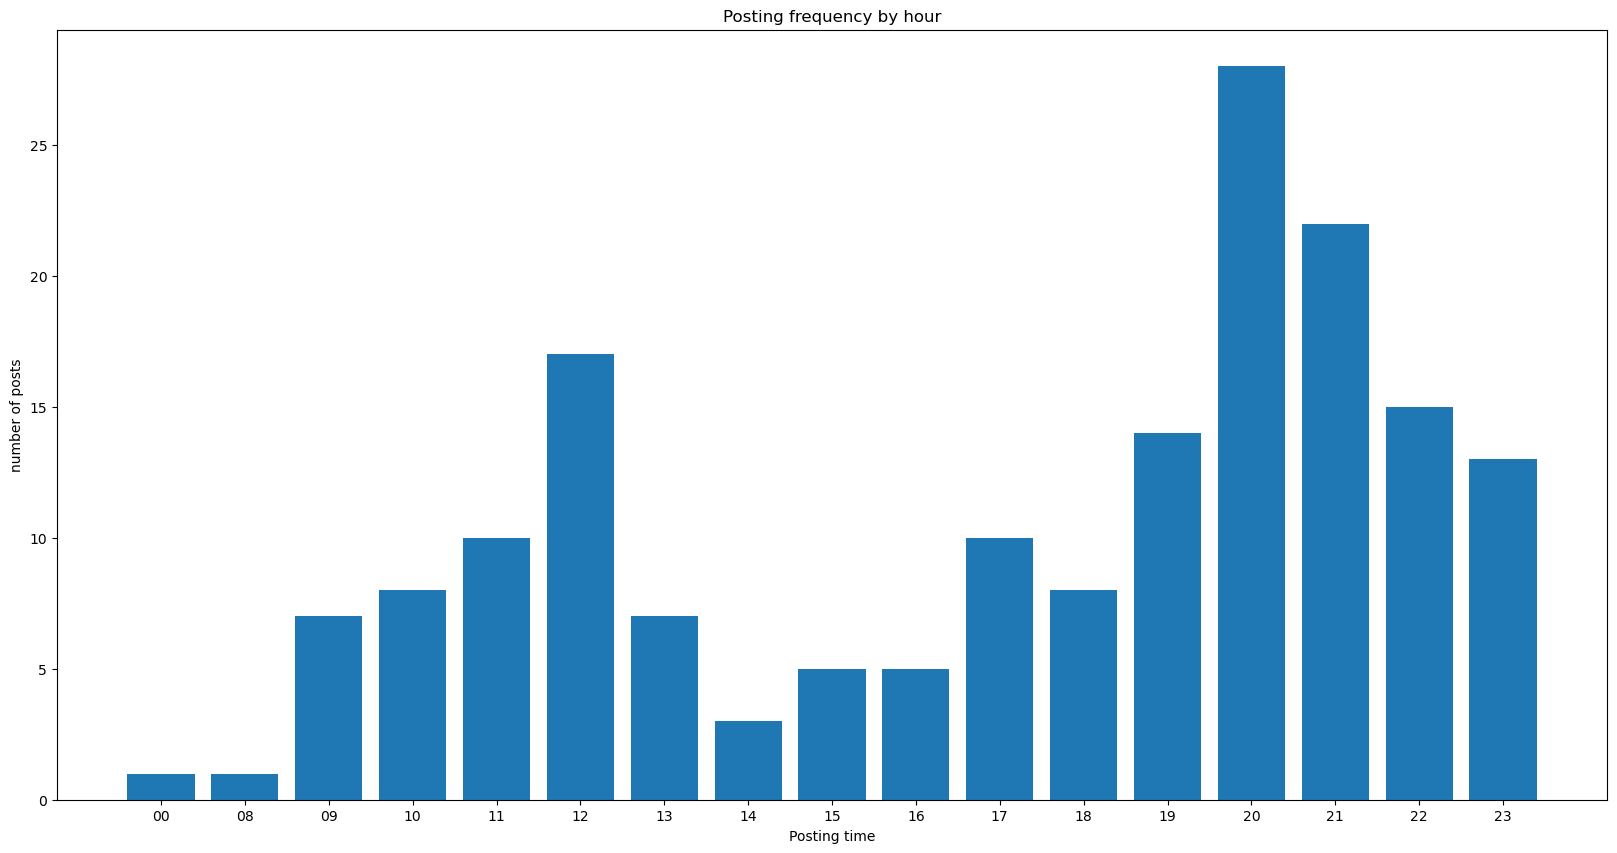

In [32]:
plt.figure(figsize=(20, 10)) 
time_posts = np.sort(post_df_full1['time'].str[11:13].unique())
number_posts = post_df_full1['time'].str[11:13].value_counts().sort_index()
plt.bar(x=time_posts,height=number_posts)
plt.xlabel('Posting time')
plt.ylabel('number of posts')
plt.title('Posting frequency by hour')

Lượng bài đăng thay đổi trong các ngày.

Text(0.5, 1.0, 'Posting frequency by hour')

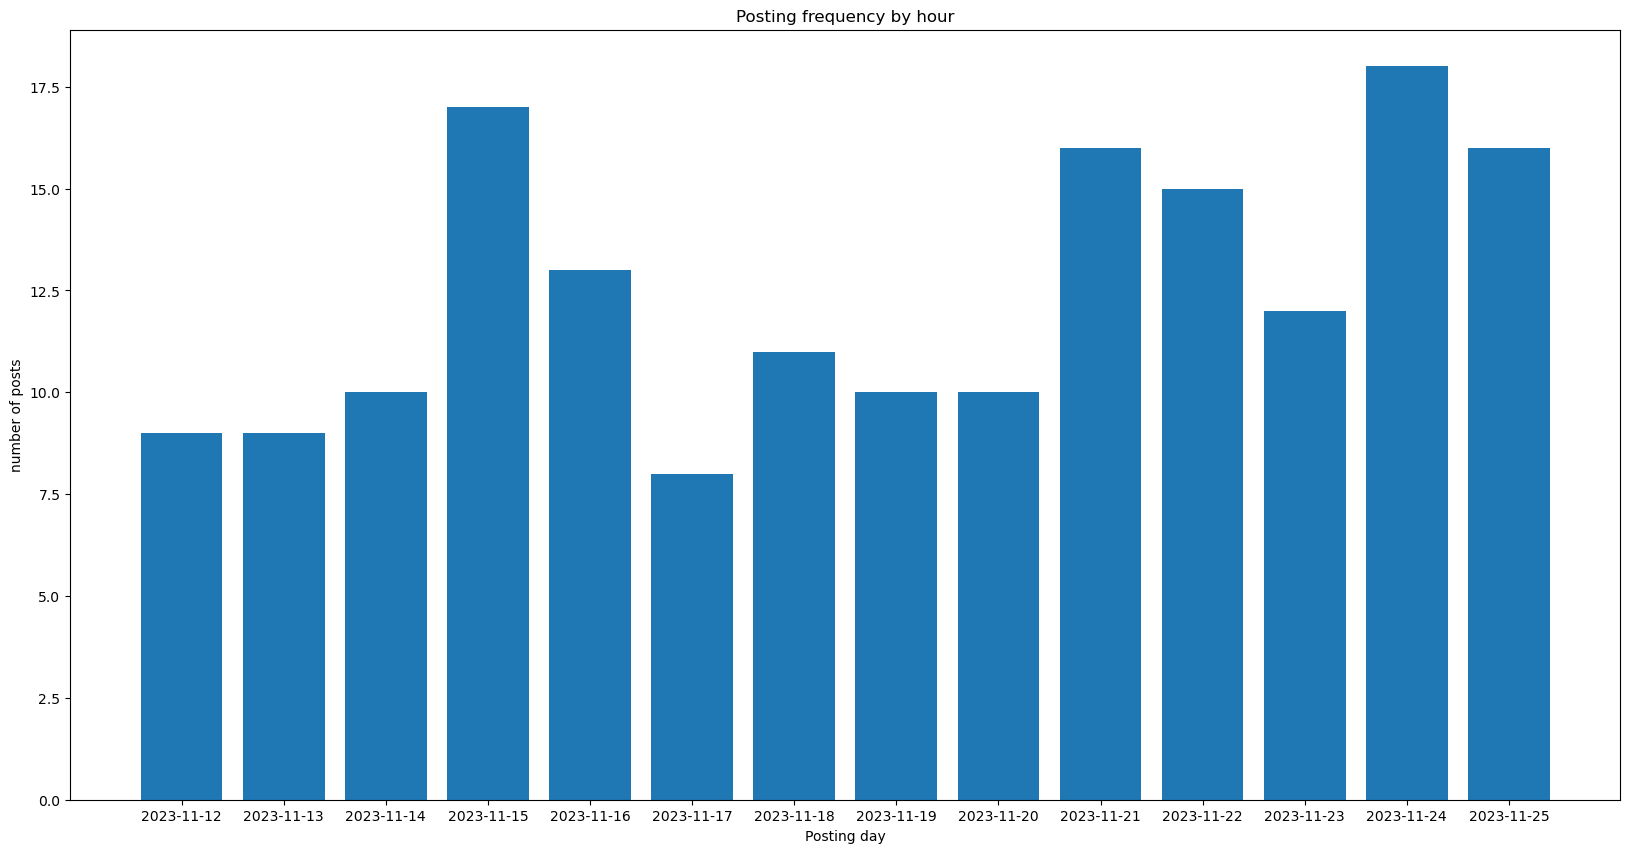

In [31]:
plt.figure(figsize=(20, 10)) 
day_posts = np.sort(post_df_full1['time'].str[0:10].unique())
number_posts = post_df_full1['time'].str[0:10].value_counts().sort_index()
plt.bar(x=day_posts,height=number_posts)
plt.xlabel('Posting day')
plt.ylabel('number of posts')
plt.title('Posting frequency by hour')

 Số lượt tương tác trong các bài đăng thay
đổi như thế nào?

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
 Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được
thu thập?;

In [18]:
# sao chep post_text vao mang string.
text = ""
for i in post_df_full1["post_text"]:
    text = text + i + "\n"

In [19]:
# Import thư viện WordCloud 
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

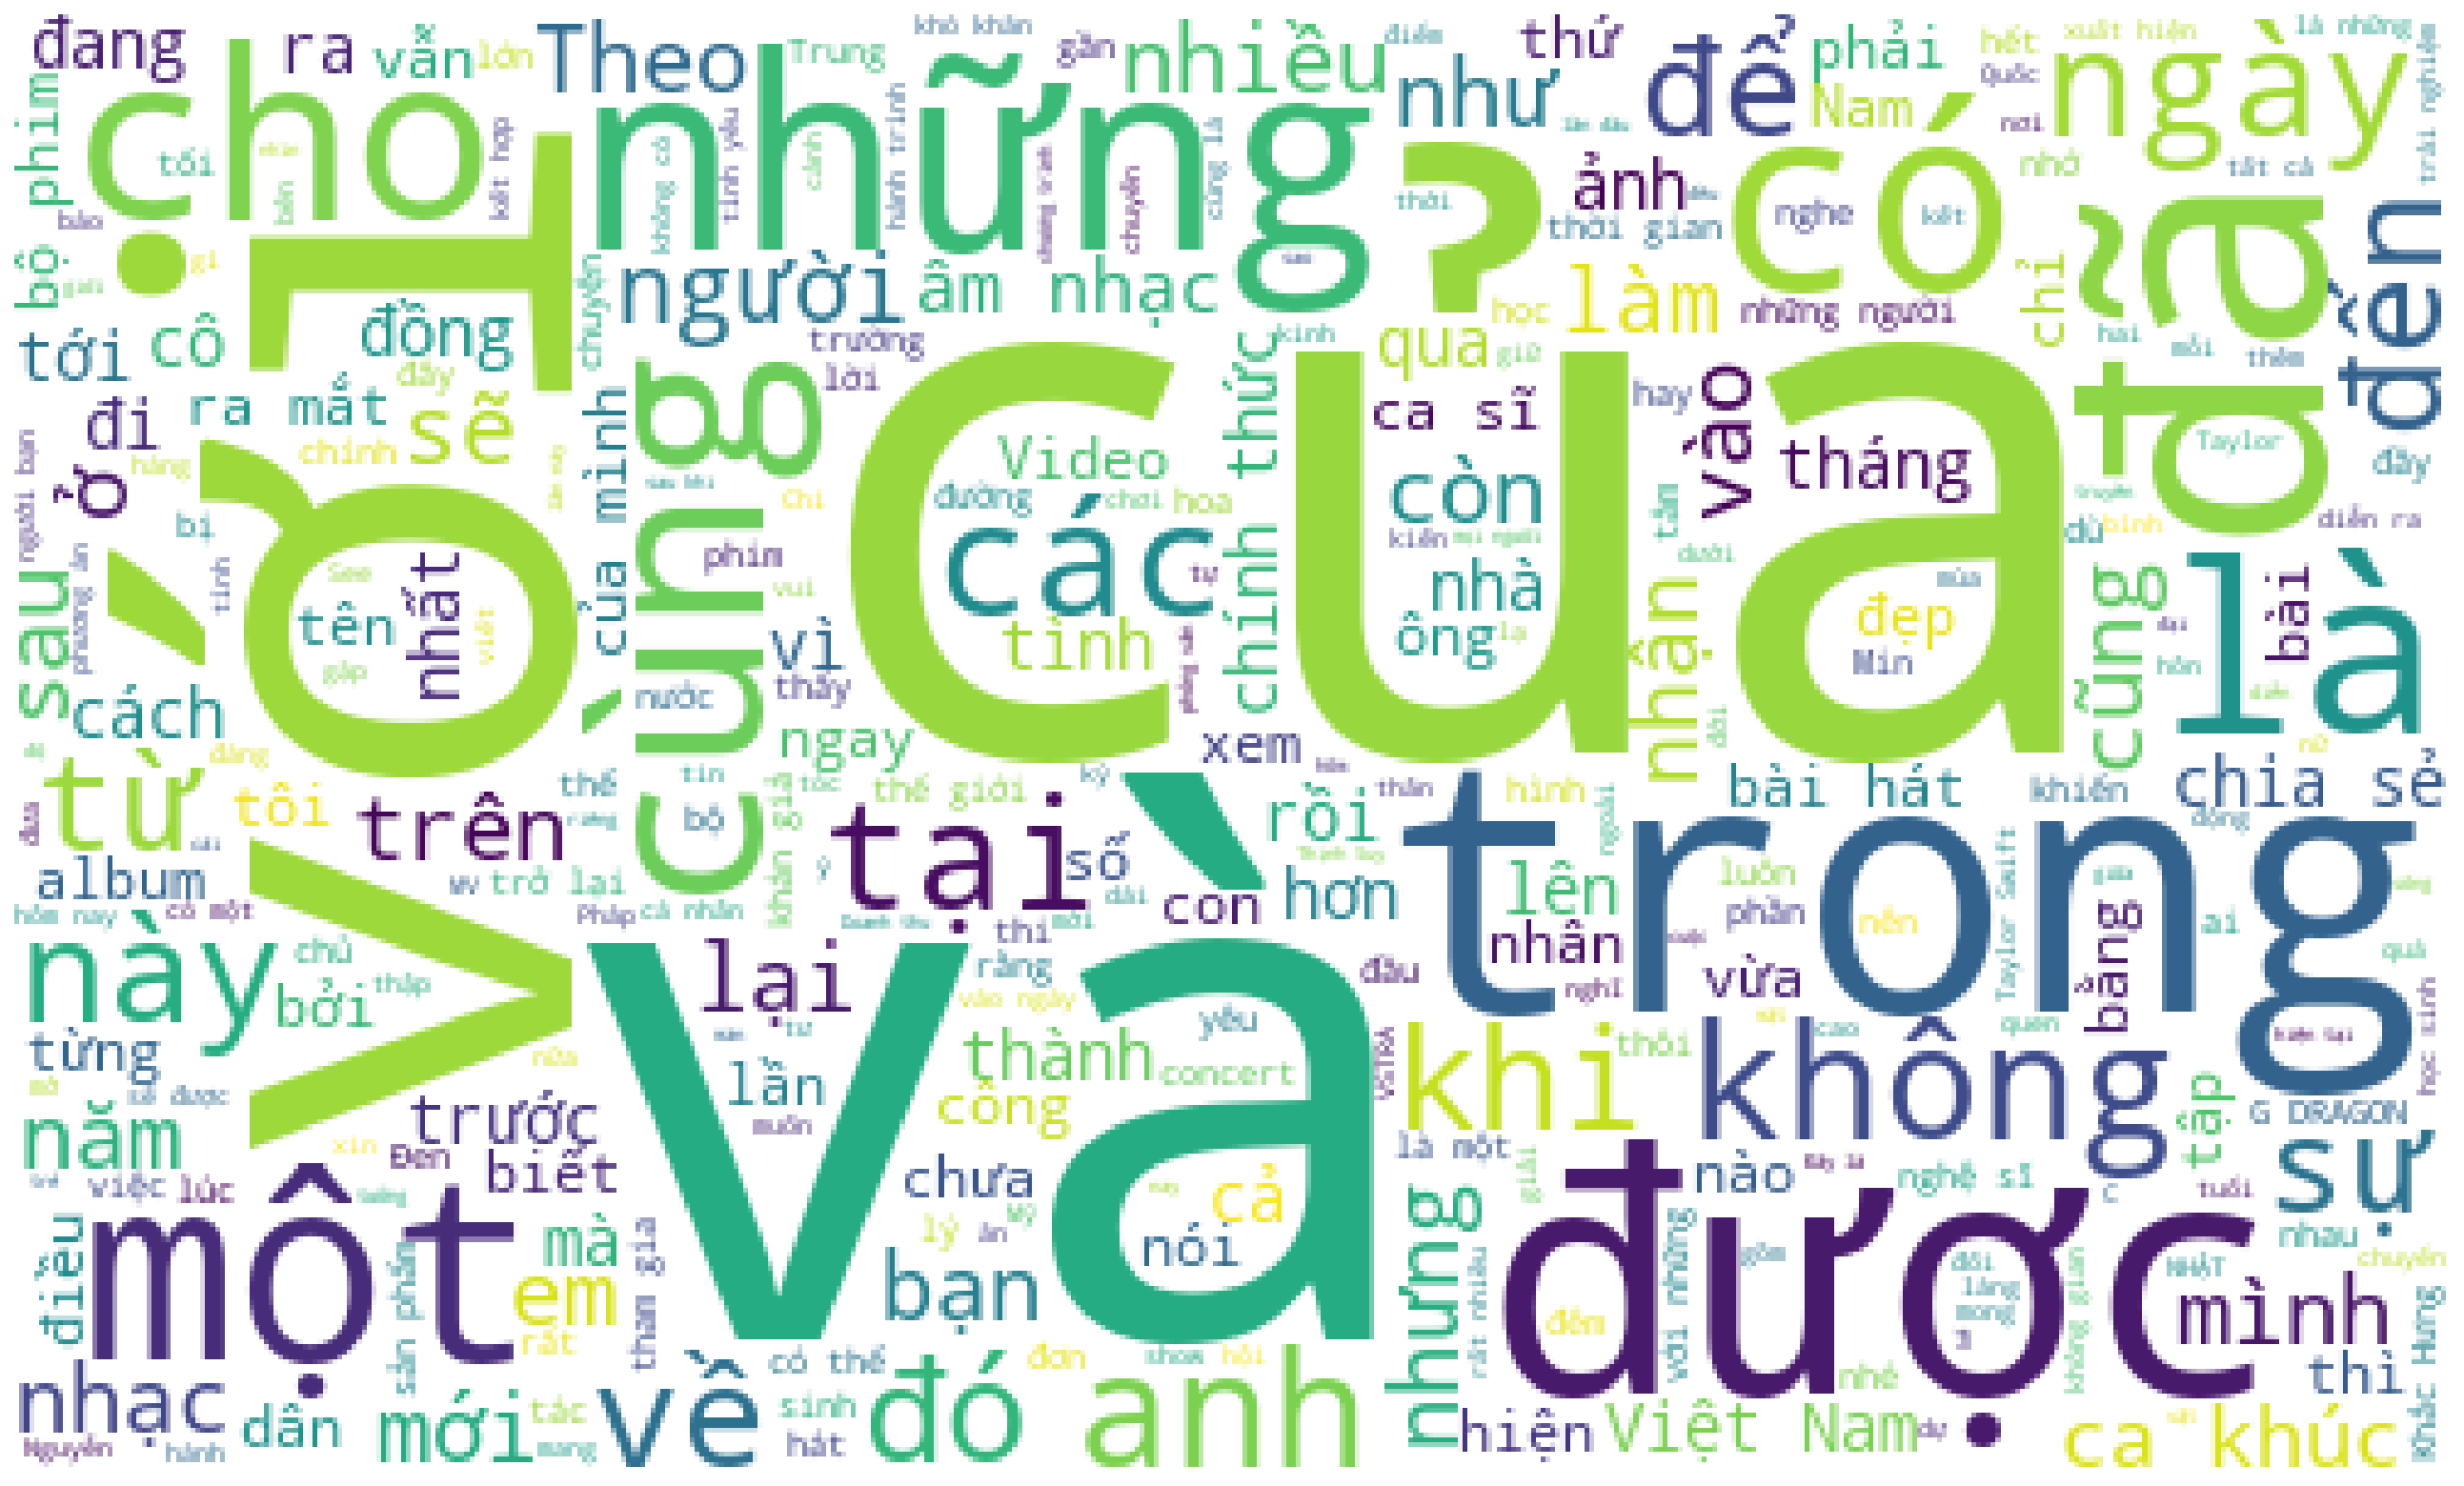

In [20]:
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- quá ít bài post ko phản ánh đúng.

In [ ]:
# tim bai viet chua tu khoa 
text_list = post_df_full1['post_text'].tolist()
res = []
for i in text_list:
    if "VSTRA" in i: res.append(i)

text_time = pd.DataFrame({"post_text":[],"time":[]})
a = []
b = []

for i in res:
    text_time = post_df_full1[post_df_full1['post_text'] == i]['time']
    

text_time.shape



(1,)

Sự tương quan giữa số lượng reactions với các trường khác như số lượng
bình luận, độ dài bài viết?